In [1]:

import numpy as np
import pandas as pd


In [24]:
df = pd.read_csv('spam.csv', encoding='iso-8859-1')





In [26]:

df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
147,ham,Ummma.will call after check in.our life will b...,NaN,NaN,NaN
1088,spam,You are awarded a SiPix Digital Camera! call 0...,NaN,NaN,NaN
1599,ham,"Yeah probably, I still gotta check out with leo",NaN,NaN,NaN
5469,ham,Ok lor.,NaN,NaN,NaN
545,ham,Then any special there?,NaN,NaN,NaN


In [28]:
df.shape

(5572, 5)

In [ ]:
# 1. data cleaning
# 2.EDA
# 3.Text Preprocessing
# 4. Model building
# 5. evaluation
# 6. Improvement
# 7. website
# 8. deplay

## data cleaning


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [32]:
df.sample(5)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
365,ham,Well i know Z will take care of me. So no worr...,NaN,NaN,NaN
390,ham,Huh so late... Fr dinner?,NaN,NaN,NaN
2161,ham,Is she replying. Has boye changed his phone nu...,NaN,NaN,NaN
2864,ham,He says hi and to get your ass back to south t...,NaN,NaN,NaN
5222,ham,5 nights...We nt staying at port step liao...T...,NaN,NaN,NaN


In [34]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

df.sample(5)


,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
4462,ham,He said i look pretty wif long hair wat. But i...,NaN,NaN,NaN
1236,ham,How much are we getting?,NaN,NaN,NaN
5452,ham,What???? Hello wats talks email address?,NaN,NaN,NaN
4505,ham,When are you guys leaving?,NaN,NaN,NaN
997,ham,Not a lot has happened here. Feels very quiet....,NaN,NaN,NaN


In [82]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [84]:
df['target'] = encoder.fit_transform(df['target'])

In [80]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [78]:
# missing values
df.isnull().sum()

target               0
text                 0
Unnamed: 2        5126
Unnamed: 3        5159
Unnamed: 4        5164
num_characters       0
num_words            0
num_sentences        0
dtype: int64

In [76]:
# check for duplicate
df.duplicated().sum()

0

In [74]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [70]:
df.duplicated().sum()


403

In [72]:
df.shape

(5572, 8)

## 2.EDA

In [68]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [ ]:
df['target'].value_counts()


In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [ ]:
# data is imbalanced


In [48]:
import nltk

In [44]:
!pip install nltk

In [50]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/messi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
df['num_characters'] = df['text'].apply(len)

In [54]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61


In [60]:
# number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [62]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15


In [64]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [66]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1


In [86]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [98]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

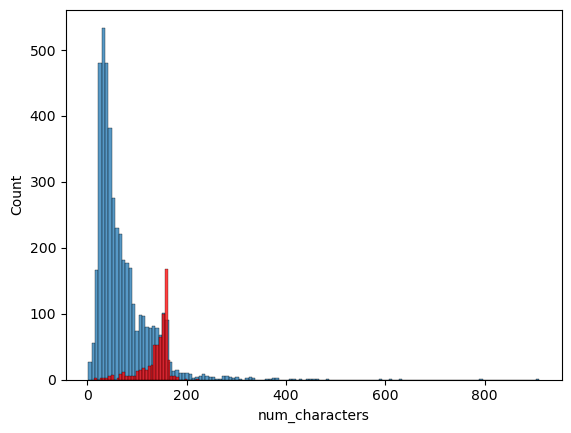

In [104]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color ='red')

## DATA PREPROCESSING

# >Lower case
# >tokenization
# >removing special characters
# >removing stop words and punctuation
# >stemming

In [198]:
import nltk
from nltk.corpus import stopwords
import string

# Ensure stopwords are downloaded
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    # Remove alphanumeric words only
    for i in text:
        if i.isalnum():
            y.append(i)
    
    # Filter out stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
         y.append(ps.stem(i))
        
    
    return " ".join(y)

# Test the function
transform_text('i love the yt lectures on ml .how about you ?')


[nltk_data] Downloading package stopwords to /Users/messi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love yt lectur ml'

In [200]:
 df['transform_text']=df['text'].apply(transform_text)

In [202]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,61,15,1,nah think goe usf live around though


In [212]:
!pip install wordcloud

In [216]:

from wordcloud import WordCloud
wc =WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [218]:
spam_wc =wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

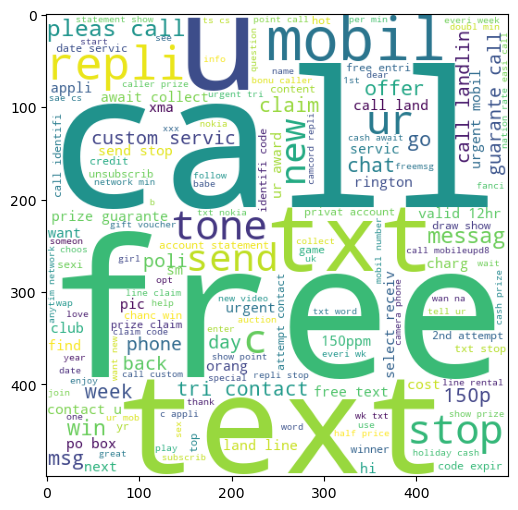

In [226]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [228]:
hem_wc =wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

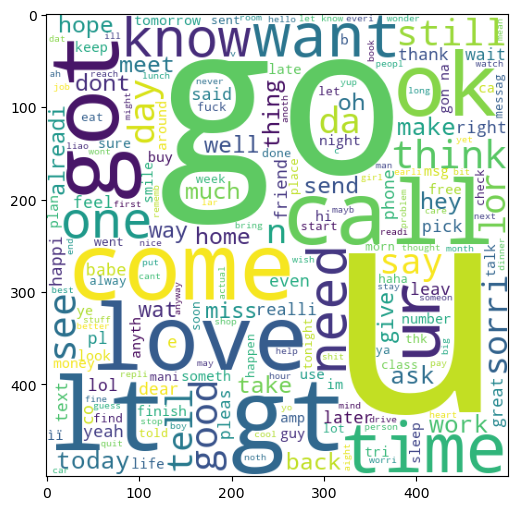

In [230]:
plt.figure(figsize=(12,6))
plt.imshow(hem_wc)

In [252]:
spam_corpus=[]
for msg in df[df['target'] == 1]['transform_text'].tolist():
      for word in msg.split():
          spam_corpus.append(word)

In [256]:
len(spam_corpus)

9939

# MODEL BUILDING

In [325]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [337]:
X =cv.fit_transform(df['transform_text']).toarray()



In [339]:
X.shape

(5169, 6708)

In [341]:
y=df['target'].values

In [343]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [345]:
 from sklearn.model_selection import train_test_split

In [347]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [349]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [351]:

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [353]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [361]:

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [359]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [387]:
# tfidf --> MNB
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 308.3 kB/s eta 0:00:00a 0:00:02


In [391]:


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [393]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [395]:

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [397]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [402]:


train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9264990328820116, 0.7421875)

In [404]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9245647969052224
Precision -  0.9166666666666666
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [405]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [407]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
3,DT,0.924565,0.916667
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [408]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [409]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,DT,Accuracy,0.924565
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


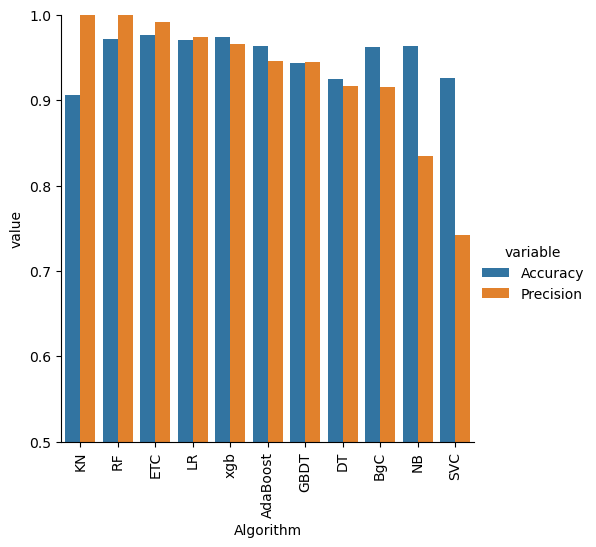

In [410]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [411]:

# model improve
# 1. Change the max_features parameter of TfIdf

In [412]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [421]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)



In [423]:
new_df = performance_df.merge(temp_df,on='Algorithm')



In [425]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [431]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores})

In [433]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907
7,DT,0.924565,0.916667,0.924565,0.916667,0.924565,0.916667,0.924565
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217


In [435]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [437]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [463]:

voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [ ]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [ ]:

from sklearn.ensemble import StackingClassifier


In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)



In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [460]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
